# Foundations of Data Science
## Homework 5 

Student Name: 
Student Netid: ***

### Part 1: Critique this plan (8 points)
1\. Your CIO invited his buddy from Tok Aton consulting to propose a project using data mining to improve the targeting of the new service that you have been a principal in developing. The service has been quite successful so far, being marketed over the last 6 months via your ingenious, and very inexpensive, word-of-mouth campaign. You've already garnered a pretty large customer base without any targeting, and you've been seeing this success as your best stepping stone to bigger and better things in the firm. 

After some reflection, you've decided that your best course of action is to play a key role in ensuring the success of this data mining project as well. You agree with your CIO's statement in a meeting with Tok Aton, that accurate targeting might cost-effectively expand your audience substantially to consumers that word-of-mouth would not reach. You accept that what Tok Aton says about the characteristics of your service is accurate.

Based on what we have covered in class, identify the four most serious weaknesses/flaws in this abridged version of Tok Aton's proposal, and suggest how to ameliorate them.  Your answer should be 4 bullet points, each comprising 2-4 sentences: 1-2 sentences stating each weakness, and 1-2 sentences suggesting a better alternative.  Maximal credit will be given when the 4 points are as independent as possible.


```
--------------------------------------------------------------------------
                            Targeted Audience Expansion             
                      Prepared by Tok Aton Consulting, Inc.

Your problem is to expand the audience of your new service.  We (Tok Aton) have a large database of consumers who can be targeted.  We will build a predictive model to estimate which of these consumers are the most likely to adopt the product, and then target them with the special offer you have designed.

More specifically, we will build a logistic regression (LR) model to predict adoption of the service by a consumer, based on the data on your current customers of this service.  The model will be based on their demographics and their usage of the service. We believe that logistic regression is the best choice of method because it is a tried-and-true statistical modeling technique, and we can easily interpret the coefficients of the model to infer whether the attributes are statistically significant, and whether they make sense. If they are statistically significant and they do make sense, then we can have confidence that the model will be accurate in predicting service uptake. We will apply the model to our large database of consumers, and select out those who have not yet subscribed and whom the LR model predicts to be the most likely to subscribe.  To these we will send the targeted offer. As this is a fixed-profit-per-customer service, this also will in effect rank them by expected profit.
--------------------------------------------------------------------------
```

1. Logistic Regression is generally a good algorithm when the dependent variable is dichotomous (i.e binary). However here we are considering demographic factors which has many features. Logistic regression won't be able to determine feature importance properly. For this, we can instead use Algortihms such as Decision Tree or Random Forest which are better at determinig the multiple feature importance in a problem.

2. The company is thinking of building a model on the basis of data of their current customers. The labels assigned will be 1 or "Yes". They are not considering other class label (i.e targeting people who are not their customers). The solution to this : Try collecting more data or resampling the dataset - add copies of instances from the under-represented i.e over-sampling (or more formally sampling with replacement)or delete instances from the over-represented class i.e under-sampling.

3. The Model is based on demographic data which might have many correlated features (i.e. features that will bring about same information). This problem can be overcome by doing proper feature selection for the model.

4. Client is interested in knowing about the consumers who are likely to adopt the product. But logistic regression will return answer as yes or no, i.e consumer will either adopt the product or not. Tree based algorithm will be better at predicting the likelihood.

### Part 2: Sentiment analysis (12 points)

In this assignment we will be looking at a directed, signed network regarding Wikipedia editors who want to become an administrator. In order for this to happen, a request for adminship (RfA) is submitted, either by the candidate or by another community member. Subsequently, any Wikipedia member may cast a supporting, neutral, or opposing vote.

The dataset and further description can be found here:
https://snap.stanford.edu/data/wiki-RfA.html

In sum, nodes represent Wikipedia members and edges represent votes. Each entry in the dataset also includes text of a comment associated with the vote.



1\. Convert the data into a pandas `DataFrame()`, which will have one column for each of the data attributes, SRC, TGT, etc. (3 points) 

In [3]:
#code here
import pandas as pd
import numpy as np
dataframe_dict = dict()

f_open = open("wiki-RfA.txt" , "r")
lines = (line.rstrip() for line in f_open) # All lines including the blank ones
lines = (line for line in lines if line) # Non-blank lines

for line in lines:
    split = line.find(":")
    key = line[0:split]
    value = line[split+1:len(line)]
    if dataframe_dict.get(key):
        dataframe_dict[key].append(value)
    else:
        dataframe_dict[key] = []
        dataframe_dict[key].append(value)
        
data_wiki = pd.DataFrame.from_dict(dataframe_dict)
print(data_wiki.head())
print(data_wiki[100:120])

                    DAT RES         SRC  TGT  \
0  23:13, 19 April 2013   1   Steel1943  BDD   
1  01:04, 20 April 2013   1  Cuchullain  BDD   
2  23:43, 19 April 2013   1   INeverCry  BDD   
3  00:11, 20 April 2013   1   Cncmaster  BDD   
4  00:56, 20 April 2013   1  Miniapolis  BDD   

                                                 TXT VOT   YEA  
0                           '''Support''' as co-nom.   1  2013  
1                      '''Support''' as nominator.--   1  2013  
2                            '''Support''' per noms.   1  2013  
3  '''Support''' per noms. BDD is a strong contri...   1  2013  
4  '''Support''', with great pleasure. I work wit...   1  2013  
                      DAT RES                SRC  TGT  \
100  00:03, 25 April 2013   1          Trusilver  BDD   
101  00:09, 25 April 2013   1        RegentsPark  BDD   
102  00:55, 25 April 2013   1            Mediran  BDD   
103  07:27, 25 April 2013   1            Kudpung  BDD   
104  07:43, 25 April 2013   1  The T

2\. Using the VOT column as the target variable, code the values as -1 or 0  as '0' and 1 to stay as '1'. (1 point)


In [4]:
data_wiki['VOT'] = data_wiki['VOT'].replace(["-1","0"], 0)
data_wiki['VOT'] = data_wiki['VOT'].replace("1", 1)

data_wiki[100:120]

,DAT,RES,SRC,TGT,TXT,VOT,YEA
100,"00:03, 25 April 2013",1,Trusilver,BDD,'''Support''' While I lend a great deal of wei...,1,2013
101,"00:09, 25 April 2013",1,RegentsPark,BDD,'''Support''' BDD has been a good RM closer an...,1,2013
102,"00:55, 25 April 2013",1,Mediran,BDD,'''Support''',1,2013
103,"07:27, 25 April 2013",1,Kudpung,BDD,'''Support'''. There are a few valid rationale...,1,2013
104,"07:43, 25 April 2013",1,The Transhumanist,BDD,'''Support''',1,2013
105,"11:51, 25 April 2013",1,Bloom6132,BDD,'''Support''' – A great contributor with a ton...,1,2013
106,"14:02, 25 April 2013",1,SmokeyJoe,BDD,"'''Support'''. ""Trust"" seem to not be in quest...",1,2013
107,"15:57, 25 April 2013",1,Yintan,BDD,'''Support''' per Dirtlawyer1. Nobody is an al...,1,2013
108,"16:05, 25 April 2013",1,Piotrus,BDD,'''Support'''. I don't see the lack of extensi...,1,2013
109,"16:49, 25 April 2013",1,Erik,BDD,'''Support''' per clean block log and no indic...,1,2013


3\. Put all of the text (TXT column) into a data frame called `X` and the target variable in a data frame called `Y`. Make a train/test split where you give 75% of the data to training. (2 points)

In [5]:
from sklearn.cross_validation import train_test_split
X = data_wiki.TXT
Y = data_wiki.VOT
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=.75)

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


4\. Create a binary `CountVectorizer()` and `TfidfVectorizer()`. Use the original single words as well as bigrams. Also, use an "english" stop word list. Fit these to the training data to extract a vocabulary and then transform both the train and test data. (3 points)

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Creating binary count vectorizer
vactorizer_count = CountVectorizer(binary=True, stop_words="english", ngram_range=(1,2))
vactorizer_count.fit(X_train)
X_train_count_vect = vactorizer_count.transform(X_train)
X_test_count_vect = vactorizer_count.transform(X_test)

# Creating Tfid vectorizer
vectorizer_tfidf = TfidfVectorizer(binary=True, stop_words="english", ngram_range=(1,2))
vectorizer_tfidf.fit(X_train)
X_train_tfidf_vect = vectorizer_tfidf.transform(X_train)
X_test_tfidf_vect = vectorizer_tfidf.transform(X_test)

5\. Create `LogisticRegression()` and `BernoulliNB()` models. For all settings, keep the default values. In a single plot, show the AUC curve for both classifiers and both the binary and tfidf feature sets. In the legend, include the area under the ROC curve (AUC). Do not forget to label your axes. Your final plot will be a single window with 4 curves.

Which model do you think does a better job? Why? Explain in no more than a paragraph. (3 points)

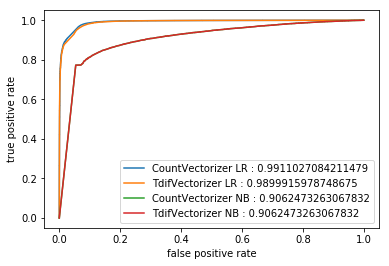

In [16]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn import metrics

%matplotlib inline

# Logistic Regression Model for CountVectorizer
count_vector_logregression = LogisticRegression()
count_vector_logregression.fit(X_train_count_vect, Y_train)
fpr, tpr, thresholds = metrics.roc_curve(Y_test, count_vector_logregression.predict_proba(X_test_count_vect)[:,1])
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.plot(fpr, tpr, label = 'CountVectorizer LR : ' + str(metrics.auc(fpr, tpr)))

#Logistic Regression Model for TdifVectorizer
tdif_vector_logregression  = LogisticRegression()
tdif_vector_logregression.fit(X_train_tfidf_vect, Y_train)
fpr, tpr, thresholds = metrics.roc_curve(Y_test, tdif_vector_logregression.predict_proba(X_test_tfidf_vect)[:,1])
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.plot(fpr, tpr, label = 'TdifVectorizer LR : ' + str(metrics.auc(fpr, tpr)))

#BernoulliNB Model for CountVectorizer
count_vector_bernoulliNB = BernoulliNB()
count_vector_bernoulliNB.fit(X_train_count_vect,Y_train)
fpr, tpr, thresholds = metrics.roc_curve(Y_test, count_vector_bernoulliNB.predict_proba(X_test_count_vect)[:,1])
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.plot(fpr, tpr, label = 'CountVectorizer NB : ' + str(metrics.auc(fpr, tpr)))

#BernoulliNB Model for TdifVectorizer
tdif_vector_bernoulliNB = BernoulliNB()
tdif_vector_bernoulliNB.fit(X_train_tfidf_vect, Y_train)
fpr, tpr, thresholds = metrics.roc_curve(Y_test, tdif_vector_bernoulliNB.predict_proba(X_test_tfidf_vect)[:,1])
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.plot(fpr, tpr, label = 'TdifVectorizer NB : ' + str(metrics.auc(fpr, tpr)))

plt.legend()
plt.show()

Answer : For the above case the model which performs better is Logistic Regression. Bernoulli NB is based on independent probability i.e. P(XY) = P(x)P(Y), so it assumes p(X/Y) to be an independent event, which is actually a conditional event.

### Part 3: Network analysis and visualization (10 points)

In this part of the assignment we will analyze basic characteristics of the same Wikipedia network used in Part 2.


1. Prepare an edgefile for importing. First, map the node names to integer values. For data values, let's just start with the VOT column value. (2 points)

In [7]:
import networkx as nx

network_dict = dict()
    
TARGET = []
SOURCE = []

edge_networkfile = data_wiki[['SRC','TGT','VOT','RES']]
edge_networkfile.dropna()
edge_networkfile = edge_networkfile[edge_networkfile.TGT != '']
edge_networkfile = edge_networkfile[edge_networkfile.SRC != '']

network_category = edge_networkfile.SRC
network_category = network_category.append(edge_networkfile.TGT, ignore_index=True)
network_category = pd.Series(network_category.unique())
network_category = network_category.dropna()
network_category = network_category.astype("category")



for x,y in zip(network_category, network_category.cat.codes):
    network_dict[x] = y
    
# print (network_dict)


for index, row in edge_networkfile.iterrows():
    SOURCE.append(network_dict[row['SRC']])
    TARGET.append(network_dict[row['TGT']])

edge_networkfile.SRC = SOURCE
edge_networkfile.TGT = TARGET

G = nx.from_pandas_edgelist(edge_networkfile,'SRC','TGT',['VOT','RES'])
nx.write_edgelist(G,"wiki_edgelist")
print ("Created Edge List File")

Created Edge List File


2\. Now load the data as a graph object called 'Gwik'. (1 point)

In [8]:
Gwik = nx.read_edgelist("wiki_edgelist")

3\. Confirm the number of nodes and edges in the graph object. (2 points)

In [19]:
print(nx.info(Gwik))

Name: 
Type: Graph
Number of nodes: 11377
Number of edges: 181073
Average degree:  31.8314


4\. Compute the degree, betweness and closeness centrality measures for the graph. Are all 3 meaningful here given what you know about the nodes and edges? (2 points)

In [9]:
betweenness_centrality = list(nx.betweenness_centrality(Gwik).values())[:5]
degree_centrality = list(nx.degree_centrality(Gwik).values())[:5]
closeness_centrality = list(nx.closeness_centrality(Gwik).values())[:5]
print(betweenness_centrality)
print(degree_centrality)
print(closeness_centrality)

[2.7845667948765124e-08, 0.0016001967952764778, 0.0006542074609563387, 0.0005522975737559507, 0.000580257363765607]
[0.00035161744022503517, 0.012218706047819971, 0.009317862165963432, 0.010372714486638537, 0.008350914205344586]
[0.2770107385492001, 0.36852505750105286, 0.36571722497267406, 0.3619126395826043, 0.3387629909770406]


1. Betweenness Centrality tells about centrality of node and is calculated as the fraction of shortest path between node pairs that pass through the node of interest. It does not hold much importance because events here are independent and does not depend on vote chain, so we don't need to know shortest path.

2. Degree Centrality here tells about the nodes which are prominent and influential. A node is important if it has many neighbors, or, in the directed case, if there are many other nodes that link to it, or if it links to many other nodes. This computation is of importance because we get to know the nodes which recieved most votes and the nodes who voted most among the voters.

3. Closeness Centrality is of no relevance because for a node u it computes the reciprocal of the sum of the shortest path distances from u to all n-1 other nodes and there is no such concept that we are looking for in this graph.

5\. Now visualize the graph. How do you visualize the edges to communicate vote values? (3 points)

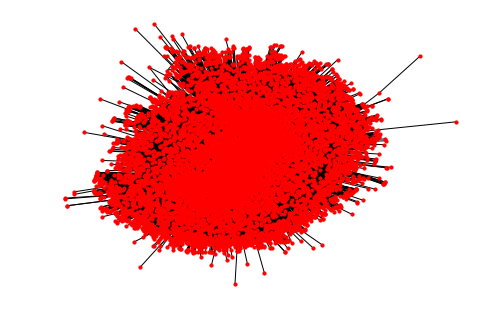

In [10]:
nx.draw(Gwik,node_size=10)
plt.show()

6\. Now also add in the resolution of the vote into your graph, and a new visualization of the network. Explain your choice of how to visually show this new information? (Optional, for a bonus: 2 points)

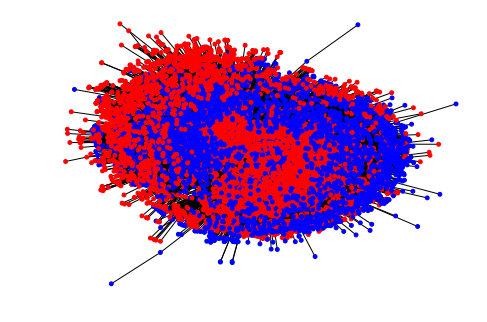

In [11]:
edge_networkfile['RES'] = edge_networkfile['RES'].replace('-1',-1)
edge_networkfile['RES'] = edge_networkfile['RES'].replace('1',1)

color_map_values = []
for result in edgefile['RES']:
    if result==1:
        color_map_values.append('red')
    else:
        color_map_values.append('blue')
    
nx.draw(Gwik, node_color=color_map_values, node_size=15)
plt.show()

Resolution Feature : It determines wether the individual was elected or not.
RES = 1 represents the individual is elected and here it is represented with red color.
RES = 0 represnts the individual is not elected and here it is represented with blue color.